In [1]:

import keras

import os
import sys
import numpy as np
root_path = os.getcwd()
sys.path.append(root_path)

# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

# define path to save model
model_path = os.path.join(root_path, 'Output', 'binary_model.h5')

data_paths = {
    'train_data_path': os.path.join(root_path, 'Dataset', 'PM_train.txt'),
    'test_data_path': os.path.join(root_path, 'Dataset', 'PM_test.txt'),
    'remaining_cycle_data_path': os.path.join(root_path, 'Dataset', 'PM_truth.txt')
}

Using TensorFlow backend.


In [2]:
from src.data_model import DataModel
from src.lstm_model import SeqModel

# Data Loading/Preprocessing

In [3]:

dataModel = DataModel(data_paths)
dataModel.load_data()
dataModel.label_data(w1=30, w0=15)


### generate sequences and convert to numpy array
# pick the feature columns 
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

sequence_length = 50
seq_array, label_array = dataModel.generate_sequence_array(sequence_length, sequence_cols)

label_array.shape

C:\Users\mevaz\Anaconda3\envs\ML_ME\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(15631, 1)

# Define and Train Model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 100)           50400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 80,651
Trainable params: 80,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 14849 samples, validate on 782 samples
Epoch 1/10
14849/14849 [==============================] - 20s 1ms/step - loss: 0.5089

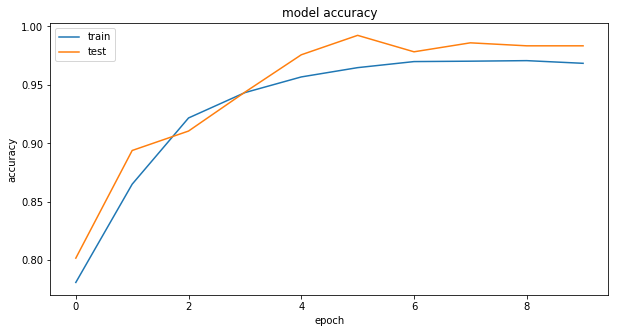

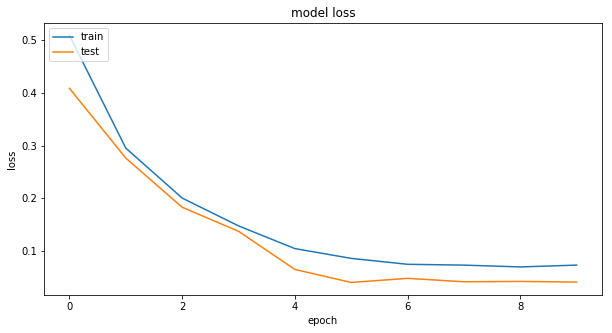

In [7]:

lstm_model = SeqModel(sequence_length, seq_array, label_array)
lstm_model.fit(model_path, epochs=10, batch_size=1000, validation_split=0.05)

lstm_model.plot_training_accuracy()


In [5]:

lstm_model.calc_training_confusion_matrix()


15631/15631 [==============================] - 8s 539us/step
Accurracy: 0.8016761681922345
15631/15631 [==============================] - 5s 350us/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12531     0]
 [ 3100     0]]
precision =  0.0 
 recall =  0.0


C:\Users\mevaz\Anaconda3\envs\ML_ME\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(93, 1)
Accurracy: 0.7311827982625654
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[68  0]
 [25  0]]
Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


C:\Users\mevaz\Anaconda3\envs\ML_ME\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mevaz\JupyterProjects\PREDICTIVE MAINTENANCE\lstm-engine-failure\src\lstm_model.py:153: RuntimeWarning: invalid value encountered in double_scalars
  f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)


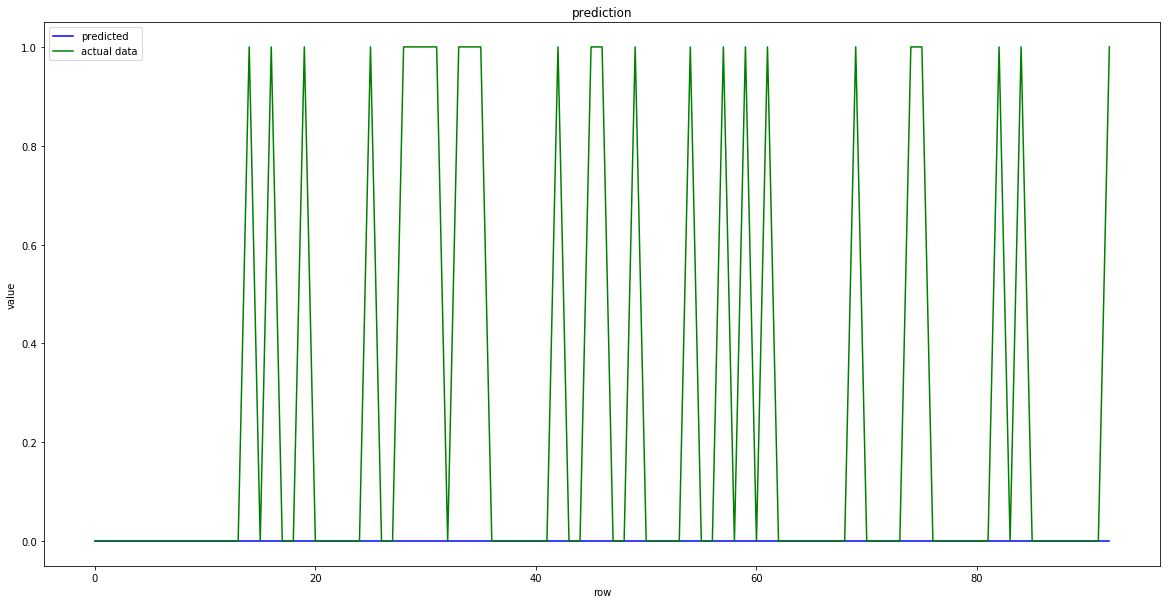

In [6]:
lstm_model.calc_testing_confusion_matrix(dataModel.test_df, model_path, sequence_cols)